In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
paths = ["trades_round_1_day_-2_wn.csv", "trades_round_1_day_-1_wn.csv", "trades_round_1_day_0_wn.csv", "trades_round_3_day_0_wn.csv", "trades_round_3_day_1_wn.csv", "trades_round_4_day_1_wn.csv", "trades_round_3_day_2_wn.csv", "trades_round_4_day_2_wn.csv", "trades_round_4_day_3_wn.csv"]
days = [0,1,2,2,3,3,4,4,5]

df = pd.DataFrame()
for i, path in enumerate(paths):
    new_df = pd.read_csv(path, delimiter=";")
    # add 1000000 to timestamp column
    new_df["timestamp"] = new_df["timestamp"] + 1000000 * days[i]
    df = pd.concat([df, new_df])

bidask_paths = ['prices_round_1_day_-2.csv', 'prices_round_2_day_-1.csv', 'prices_round_3_day_0.csv', 'prices_round_4_day_1.csv', 'prices_round_4_day_2.csv', 'prices_round_4_day_3.csv']

bidask_df = pd.DataFrame()
for i, path in enumerate(bidask_paths):
    new_df = pd.read_csv(path, delimiter=";")
    # add 1000000 to timestamp column
    new_df["timestamp"] = new_df["timestamp"] + 1000000 * i
    bidask_df = pd.concat([bidask_df, new_df])

#### Implied volatility

In [58]:
from scipy.stats import norm
from scipy.optimize import newton

def black_scholes_price(S, K, t, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    price = S * norm.cdf(d1) - K * np.exp(-r * t) * norm.cdf(d2)
    return price

def implied_volatility(market_price, S, K, t, r, initial_guess=0.2):
    objective_function = lambda sigma: black_scholes_price(S, K, t, r, sigma) - market_price
    return newton(objective_function, initial_guess)

In [69]:
coupon = bidask_df[bidask_df["product"]=="COCONUT_COUPON"]
coconut = bidask_df[bidask_df["product"]=="COCONUT"]

In [70]:
coupon

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_volume_3,mid_price,profit_and_loss,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
1,1.0,3000000,COCONUT_COUPON,637.0,39.0,NaN,NaN,NaN,NaN,638.0,...,NaN,637.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,3000100,COCONUT_COUPON,637.0,33.0,NaN,NaN,NaN,NaN,638.0,...,NaN,637.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,3000200,COCONUT_COUPON,637.0,42.0,NaN,NaN,NaN,NaN,638.0,...,NaN,637.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,3000300,COCONUT_COUPON,638.0,30.0,NaN,NaN,NaN,NaN,639.0,...,NaN,638.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,3000400,COCONUT_COUPON,637.0,33.0,NaN,NaN,NaN,NaN,638.0,...,NaN,637.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,3.0,5999500,COCONUT_COUPON,577.0,45.0,NaN,NaN,NaN,NaN,578.0,...,NaN,577.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19992,3.0,5999600,COCONUT_COUPON,577.0,30.0,NaN,NaN,NaN,NaN,578.0,...,NaN,577.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19995,3.0,5999700,COCONUT_COUPON,575.0,40.0,NaN,NaN,NaN,NaN,576.0,...,NaN,575.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19996,3.0,5999800,COCONUT_COUPON,575.0,30.0,NaN,NaN,NaN,NaN,576.0,...,NaN,575.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
IV = [implied_volatility(c, coco, 10000, 250, 0) for c, coco in zip(coupon['mid_price'], coconut['mid_price'])]

In [65]:
window_volatility = coconut['mid_price'].rolling(window=11, min_periods=11, ).std()

## graphing vinnie vs market

In [107]:
# analyze vinnie vs market
vinnie_buys = df[df["buyer"] == "Vinnie"]
vinnie_sells = df[df["seller"] == "Vinnie"]

market_trades = df[(df["buyer"] != "Vinnie") & (df["seller"] != "Vinnie")]

vinnie_coupon_buys = vinnie_buys[vinnie_buys['symbol']=='COCONUT_COUPON']
vinnie_coupon_sells = vinnie_sells[vinnie_sells['symbol']=='COCONUT_COUPON']

vinnie_coco_buys = vinnie_buys[vinnie_buys['symbol']=='COCONUT']
vinnie_coco_sells = vinnie_sells[vinnie_sells['symbol']=='COCONUT']

market_coupon_trades = market_trades[market_trades['symbol']=='COCONUT_COUPON']
market_coco_trades = market_trades[market_trades['symbol']=='COCONUT']

In [93]:
vinnie_self_trades = df[(df["buyer"] == "Vinnie") & (df["seller"] == "Vinnie")]

In [35]:
pd.unique(vinnie_buys['symbol'])

array(['AMETHYSTS', 'STARFRUIT', 'ROSES', 'STRAWBERRIES', 'CHOCOLATE',
       'GIFT_BASKET', 'COCONUT_COUPON', 'COCONUT'], dtype=object)

In [112]:
all_coconut = df[df['symbol']=='COCONUT']

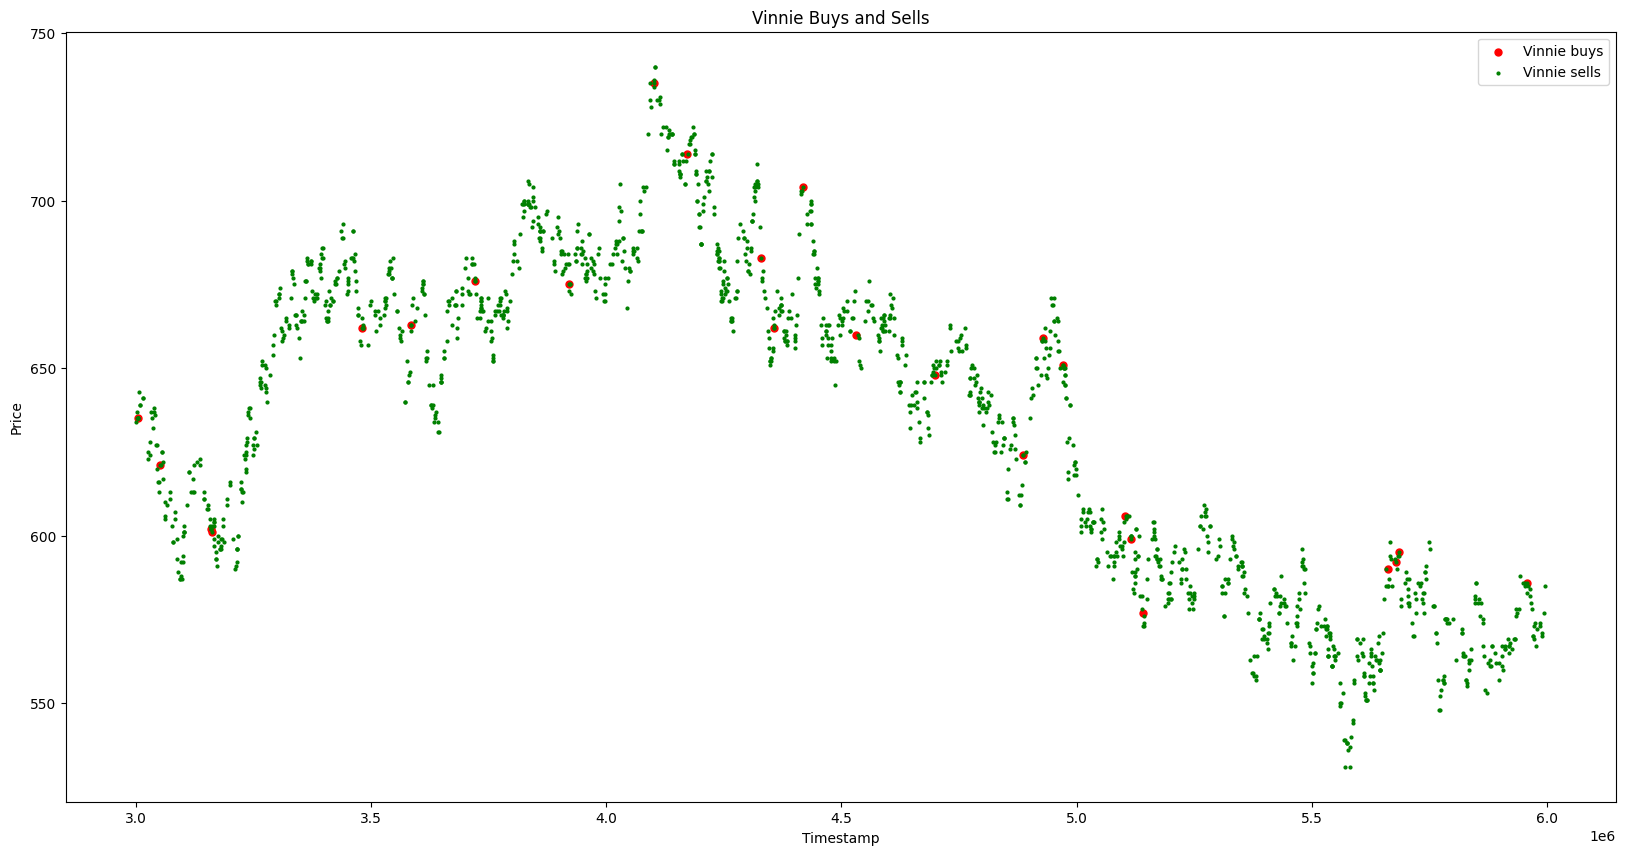

In [115]:
plt.figure(figsize=(20, 10))
# Plotting "Vinnie buys" and "Vinnie sells"
# no_t = len(vinnie_coco_buys['timestamp'])//40
plt.scatter(vinnie_coupon_buys['timestamp'], vinnie_coupon_buys['price'], label='Vinnie buys', s=25, color='red')
plt.scatter(vinnie_coupon_sells['timestamp'], vinnie_coupon_sells['price'], label='Vinnie sells', s=4, color='green')
# plt.scatter(vinnie_self_trades['timestamp'][:no_t], 50 *vinnie_self_trades['quantity'][:no_t], label='Vinnie self trades', s=4, color='black')
# plt.scatter(market_coupon_trades['timestamp'], market_coupon_trades['price'], label='Market trades', s=4, color='blue')

# plot vinnie self trades
# plt.scatter(vinnie_self_trades['timestamp'], vinnie_self_trades['price'], label='Vinnie self trades', s=4, color='black')
# plot market coconut trades
# nvm there are no non vinnie trades lol


# plotting quantity
# plt.scatter(vinnie_coupon_buys['timestamp'], vinnie_coupon_buys['quantity'], label='Vinnie buys', s=25, color='black')
# plt.scatter(vinnie_coupon_sells['timestamp'], vinnie_coupon_sells['quantity'], label='Vinnie sells', s=4, color='brown')
# plot vinnie coconut quantity
# no_t = len(vinnie_coco_buys['timestamp'])//60
# plt.scatter(vinnie_coco_buys['timestamp'][:no_t], vinnie_coco_buys['quantity'][:no_t], label='Vinnie buys', s=25, color='black')
# plt.scatter(vinnie_coco_sells['timestamp'][:no_t], vinnie_coco_sells['quantity'][:no_t], label='Vinnie sells', s=4, color='brown')


# Other plot configurations
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Vinnie Buys and Sells')
plt.legend()

# Show the plot
plt.show()

# plt.plot(vinnie_coupon_buys['timestamp'], vinnie_coupon_buys['price'], 'ro', label='Vinnie buys')
# plt.plot(vinnie_coupon_sells['timestamp'], vinnie_coupon_sells['price'], 'go', label='Vinnie sells')
# plt.plot(market_coupon_trades['timestamp'], market_coupon_trades['price'], label='Market trades')
# plt.legend()

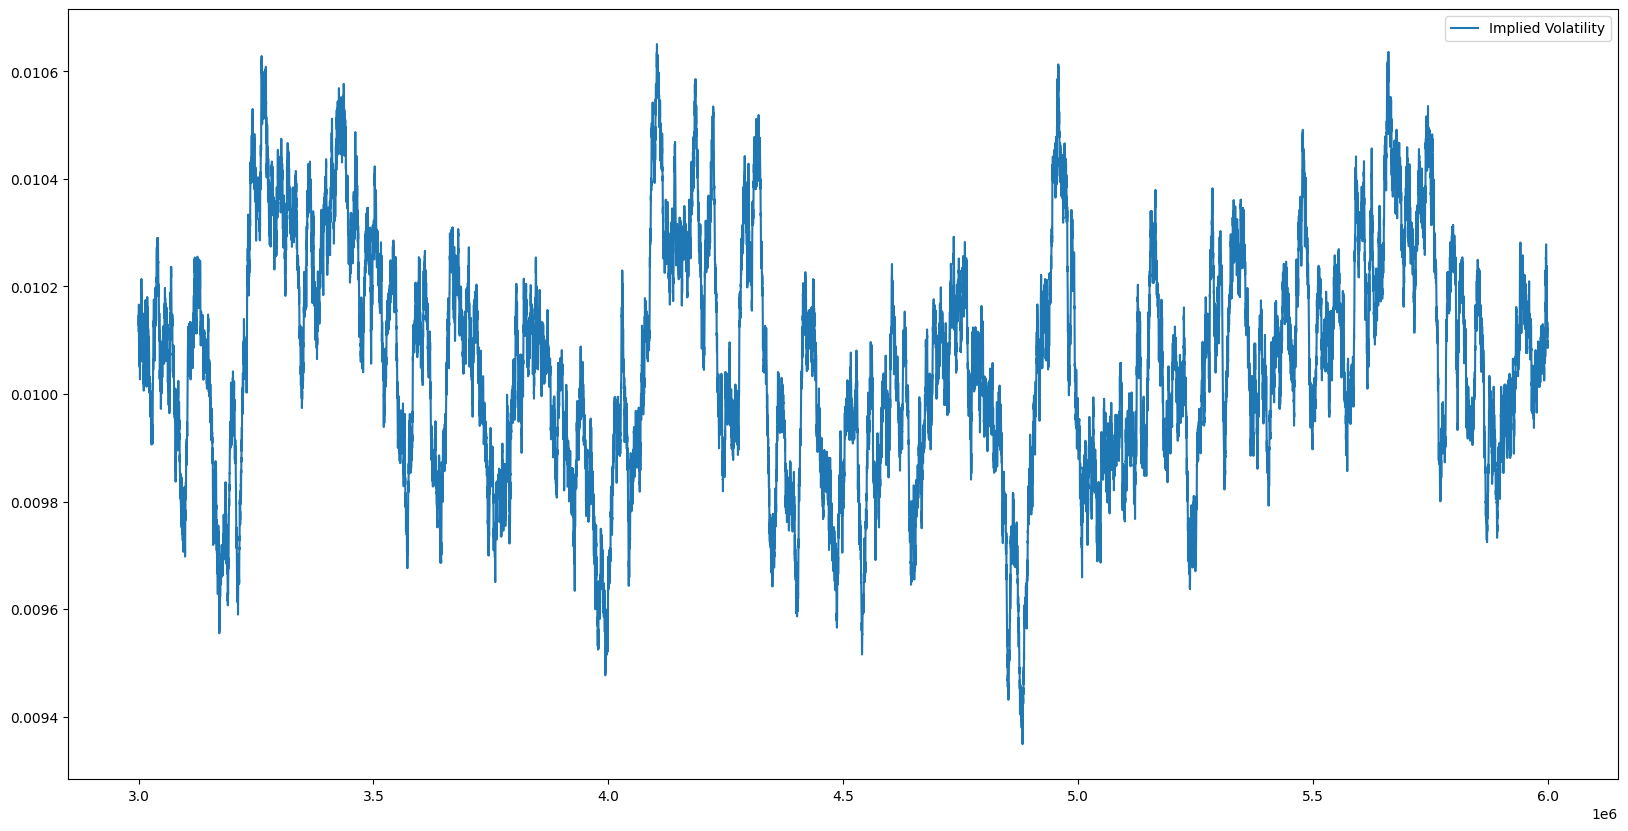

In [75]:
# plot the implied volatility
plt.figure(figsize=(20, 10))
plt.plot(coconut['timestamp'], IV, label='Implied Volatility')
# plt.plot(coconut['timestamp'], window_volatility, label='Window Volatility')
plt.legend()